## **Introduction**
Hey! Welcome to the analysis of The polynomial Approximation Problem


My name is Kartik (ES20BTECH11015) and the program is broken into 3 parts


1.   **Cost Functions**
2.  **Plots for several cases**
3.   **Which method is better!**




## **Cost Functions**
The variable is $a$ and the polynomial to be approximated is $x^n$ 
Here there are two cost functions for $||l||_1$ and $||l||_2$ norms respectively, the functions are as follows,

 $||l||_1= \sum_{j = 1}^{j= 2N+1}|x_j^n  - \sum_{i = 0}^{i = n-1}a_ix_j^i|$

 $||l||_2= \sum_{j = 1}^{j= 2N+1}(x_j^n - \sum_{i = 0}^{i = n-1}a_ix_j^i)^2$

 The "***polynomial matrix***" function creates an array with the values of the finally obtained polynomial function and stores it for plotting



In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

def power(x,n):
    return x**n

def polynomial(a,y):
    sum =0;
    for i in range(a.shape[0]):
        sum = sum + a[i]*power(y,i)
    return sum

def polynomial_matrix(a,x):
    k = np.empty(len(x))
    for i in range(len(x)):
        k[i] = polynomial(a,x[i])
    return k

def cost(x,a):
    cost = 0;
    for i in range(len(x)):
        cost += (power(x[i],n) - polynomial(a,x[i]))**2
    return cost


def cost2(x,a):
    cost2 = 0;
    for i in range(len(x)):
        J = cp.abs(power(x[i],n) - polynomial(a,x[i]))
        cost2 += (J)
    return cost2


## **The Code**
There are two parts within the for loop 

The first is for $||l||_1$ norm and the second for $||l||_2$
Clearly there are no constraints. All that is to be done is call the loss functions.
A plot is made for each one of them in every case. 

**(Scroll through them)**


Formatted strings named "***titl and string1***" are used to change titles and legends of the plots.


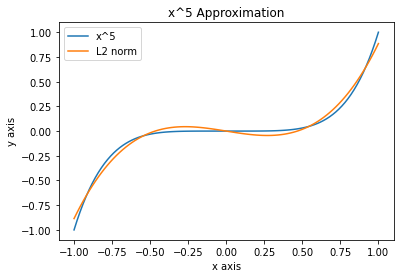

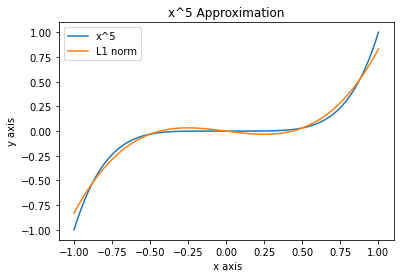

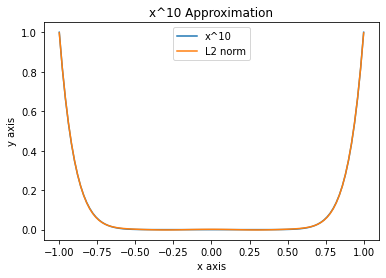

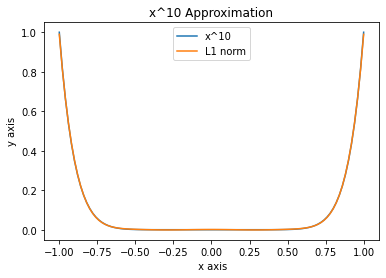

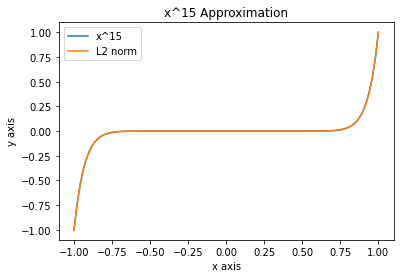

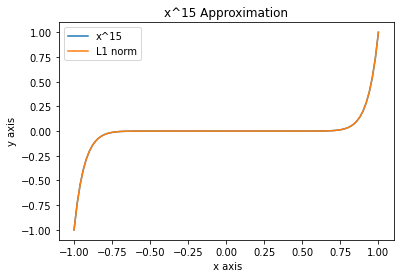

In [11]:
n_arr = [5,10,15];
for n in n_arr:
      N = 50;
      a = cp.Variable(n)
      x = np.arange(-1, 1 + 1 / N, 1 / N)
      # this is a dim1 array
      constraints = []
      objective = cp.Minimize(cost(x, a))
      problem1 = cp.Problem(objective, constraints)
      result = problem1.solve()
      string1 = f"x^{n}";
      plt.plot(x, x ** n, label= string1)
      k = polynomial_matrix(a.value, x); #very important that you pass the value here
      plt.plot(x, k, label="L2 norm");
      plt.xlabel("x axis")
      plt.ylabel("y axis")
      titl = string1 + " Approximation"
      plt.title(titl)
      plt.legend()
      plt.show()
      #part 2 of the code
      objective = cp.Minimize(cost2(x, a))
      problem2 = cp.Problem(objective, constraints)
      result2 = problem2.solve();
      import matplotlib.pyplot as plt2
      k2 = polynomial_matrix(a.value, x)
      plt2.plot(x, x ** n, label= string1)
      plt2.plot(x, k2, label="L1 norm");
      plt2.xlabel(" x axis")
      plt2.ylabel("y axis")
      plt2.title(titl)
      plt2.legend()
      plt2.show()



## **Solving The problem**
The plot for several cases are below, as you can see the plots are a perfect match for $n = 15$ and $n = 20$.This shows that we can approximate an $n$ th degree power using a $n - 1$ degree polynomial.

## **Analyzing which is better**
Creating a range of integers using "***np.arange***" is done and the values are passed to calculate best fits for each degree.


All that remains is storing the values of the errors in both norms.
This is done simulatneously, and they are stored in arrays $result_1[i]$ and $result_2[i]$


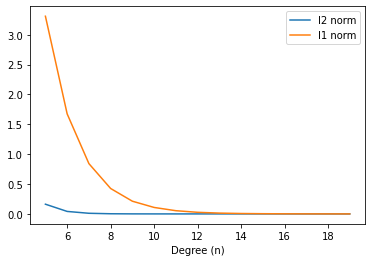

In [12]:
n_arr = np.arange(5,20,1)
result = np.empty(len(n_arr))
result2 = np.empty(len(n_arr))
i = 0;
for n in n_arr:
    N = 50;
    a = cp.Variable(n)
    x = np.arange(-1, 1 + 1 / N, 1 / N)
    # this is a dim1 array
    constraints = []
    objective = cp.Minimize(cost(x, a))
    problem1 = cp.Problem(objective, constraints)
    result[i] = problem1.solve()
    objective = cp.Minimize(cost2(x, a))
    problem2 = cp.Problem(objective, constraints)
    result2[i] = problem2.solve();

    i = i+1;

plt.plot(n_arr, result, label = "l2 norm")
plt.xlabel("Degree (n)")
plt.plot(n_arr, result2 , label = "l1 norm")
plt.legend()
plt.show()

## **Conclusion**
It is clear from the graph that the $||l_2|| $ norm does far better than the  $||l_1|| $ norm .

This completes the analysis of the problem.